[0 1 2 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 2 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
Error:  11.2%


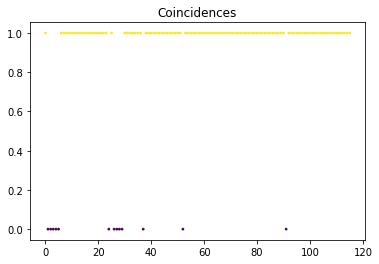

In [27]:
import numpy as np

import matplotlib.pyplot as plt

file = open("predicted.txt","r")
predicted = file.read()
predicted_lines = predicted.split('\n')

file = open("stride.txt","r")
stride = file.read()
stride_lines = stride.split('\n')

count = 0
length = len(predicted_lines) - 1
mas = np.zeros(length, type(int))
coincidences = []

for i in range(1, len(predicted_lines)):
    predicted_line = predicted_lines[i].split()
    stride_line = stride_lines[i].split()
    if (predicted_line[3] == 'H' and stride_line[6] != 'AlphaHelix') or (predicted_line[3] != 'H' and stride_line[6] == 'AlphaHelix'):
        if i != 1:
            mas[i - 1] = mas[i - 2] + 1
        else:
            mas[i - 1] = 1
        count += 1
        coincidences.append(0)
    elif (predicted_line[3] == 'E' and stride_line[6] != 'Strand') or (predicted_line[3] != 'E' and stride_line[6] == 'Strand'):
        if i != 1:
            mas[i - 1] = mas[i - 2] + 1
        else:
            mas[i - 1] = 1
        count += 1
        coincidences.append(0)
    else:
        coincidences.append(1)

for i in range(length - 1, 0, -1):
    if 0 < i < length - 1 and mas[i] != 0: 
        mas[i] = min( mas[i + 1] + 1, mas[i - 1] + 1)

print(mas)

print("Error:  " + '{0:.1f}'.format(count / length * 100) + '%')

plt.figure()
plt.scatter(range(len(coincidences)), coincidences, s=3, c=coincidences)
plt.title('Coincidences')
plt.show()

file = open("result.txt","w")

for i in range(1, length + 1):
    l = stride_lines[i].split()
    if mas[i - 1] > 0:
        file.write(l[1] + '`' + str(i) + '\n')

file.close()